In [1]:
!pip install dmba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 74.1 MB/s eta 0:00:00



## Neural Nets in Python

## Car Sales

Consider again the data on used cars (ToyotaCorolla.csv) with 1436 records and details on 38 attributes, including Price, Age, KM, HP, and other specifications. The goal is to predict the price of a used Toyota Corolla based on its specifications.

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pylab as plt

import dmba
from dmba import regressionSummary

%matplotlib inline

Colab environment detected.



Fit a neural network model to the data. Note that this is a prediction problem (Price is a numerical variable and not categorical) and not classification. Use the single hidden layer with 2 nodes. Use predictors Age_08_04, KM, Fuel_Type, HP, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, and Tow_Bar.  Remember to first convert categorical predictors to dummies and scale the numerical predictor and outcome variables to a 0–1 scale. Use MinMaxScaler() for the predictors and the following for the outcome variable.
```
minY = y.min()
rangeY = (y.max() - y.min())

# Transform the actual values to range [0, 1]
y = (y - minY) / rangeY

# Transform the predictions from range [0, 1]
y_pred = y_pred * rangeY + minY
```

Split the data into training (60%) and validation (40%) datasets. Use the random seed 1.

Record the RMS error for the training data and the validation data.

### Reduce data frame to required input and output variables

In [4]:
car_df = dmba.load_data('ToyotaCorolla.csv', encoding='latin-1')

selected_var = ['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax',
                'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player',
                'Powered_Windows', 'Sport_Model', 'Tow_Bar']
car_df = car_df[selected_var]

Convert categorical predictors to dummies

In [5]:
# Fuel type is categorical
car_df = pd.get_dummies(car_df, columns=['Fuel_Type'], drop_first=True)
car_df

,Price,Age_08_04,KM,HP,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,3,210,0,3,0,0,0,1,0,0,1,0
1,13750,23,72937,90,0,3,210,0,3,1,0,1,0,0,0,1,0
2,13950,24,41711,90,0,3,210,1,3,0,0,0,0,0,0,1,0
3,14950,26,48000,90,0,3,210,1,3,0,0,0,0,0,0,1,0
4,13750,30,38500,90,0,3,210,1,3,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,3,69,1,3,1,0,0,1,1,0,0,1
1432,10845,72,19000,86,0,3,69,0,3,0,0,0,0,1,0,0,1
1433,8500,71,17016,86,0,3,69,0,3,0,0,0,0,0,0,0,1
1434,7250,70,16916,86,0,3,69,1,3,0,0,0,0,0,0,0,1


Setup pipelines to normalize input and output data

In [6]:
y = car_df['Price']
X = car_df.drop(columns=['Price'])

scaleInput = MinMaxScaler()
X = scaleInput.fit_transform(X)

# for output keep track of the transformation yourself
minY = y.min()
rangeY = (y.max() - y.min())
y = (y - minY) / rangeY

Split data set into training (60%) and validation set (40%)

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=1)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((861, 16), (575, 16), (861,), (575,))

In [8]:
car_nnet = MLPRegressor(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', random_state=1)
car_nnet.fit(X_train, y_train)

MLPRegressor(activation='logistic', hidden_layer_sizes=2, random_state=1,
             solver='lbfgs')

Training data (2)

Regression statistics

                      Mean Error (ME) : 0.0873
       Root Mean Squared Error (RMSE) : 1112.0537
            Mean Absolute Error (MAE) : 817.7373
          Mean Percentage Error (MPE) : -1.0804
Mean Absolute Percentage Error (MAPE) : 7.9992

Validation data (2)

Regression statistics

                      Mean Error (ME) : 63.9112
       Root Mean Squared Error (RMSE) : 1079.0691
            Mean Absolute Error (MAE) : 832.1386
          Mean Percentage Error (MPE) : -0.5184
Mean Absolute Percentage Error (MAPE) : 8.3434


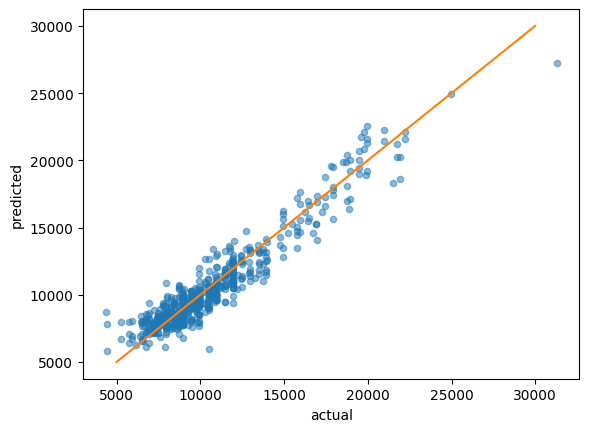

In [9]:
print('Training data (2)')
y_actual = y_train * rangeY + minY
y_pred = car_nnet.predict(X_train) * rangeY + minY
regressionSummary(y_actual, y_pred)

print('\nValidation data (2)')
y_actual = y_valid * rangeY + minY
y_pred = car_nnet.predict(X_valid) * rangeY + minY
regressionSummary(y_actual, y_pred)

ax = pd.DataFrame({'actual': y_actual, 'predicted': y_pred}).plot.scatter(x='actual', y='predicted', alpha=0.5)
plt.plot([5000, 30000], [5000, 30000], color='C1')
plt.show()

Repeat the process, changing the number of hidden layers and nodes to {single layer with 5 nodes}, {two layers, 5 nodes in each layer}.

### single layer with 5 nodes

Training data (5)

Regression statistics

                      Mean Error (ME) : 2.4900
       Root Mean Squared Error (RMSE) : 1122.2648
            Mean Absolute Error (MAE) : 824.8479
          Mean Percentage Error (MPE) : -0.9711
Mean Absolute Percentage Error (MAPE) : 8.0670

Validation data (5)

Regression statistics

                      Mean Error (ME) : 58.6432
       Root Mean Squared Error (RMSE) : 1105.2122
            Mean Absolute Error (MAE) : 860.6343
          Mean Percentage Error (MPE) : -0.4783
Mean Absolute Percentage Error (MAPE) : 8.6501


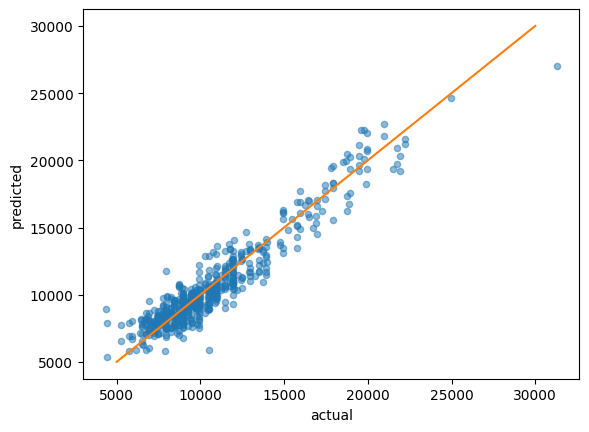

In [10]:
car_nnet = MLPRegressor(hidden_layer_sizes=(5), activation='logistic', solver='lbfgs', random_state=1)
car_nnet.fit(X_train, y_train)

print('Training data (5)')
y_actual = y_train * rangeY + minY
y_pred = car_nnet.predict(X_train) * rangeY + minY
regressionSummary(y_actual, y_pred)

print('\nValidation data (5)')
y_actual = y_valid * rangeY + minY
y_pred = car_nnet.predict(X_valid) * rangeY + minY
regressionSummary(y_actual, y_pred)

ax = pd.DataFrame({'actual': y_actual, 'predicted': y_pred}).plot.scatter(x='actual', y='predicted', alpha=0.5)
plt.plot([5000, 30000], [5000, 30000], color='C1')
plt.show()

### two layer with 5 nodes each

Training data (5, 5)

Regression statistics

                      Mean Error (ME) : 0.5898
       Root Mean Squared Error (RMSE) : 1120.9140
            Mean Absolute Error (MAE) : 818.5612
          Mean Percentage Error (MPE) : -1.0942
Mean Absolute Percentage Error (MAPE) : 7.9774

Validation data (5, 5)

Regression statistics

                      Mean Error (ME) : 83.3083
       Root Mean Squared Error (RMSE) : 1116.5807
            Mean Absolute Error (MAE) : 869.9847
          Mean Percentage Error (MPE) : -0.3566
Mean Absolute Percentage Error (MAPE) : 8.6940


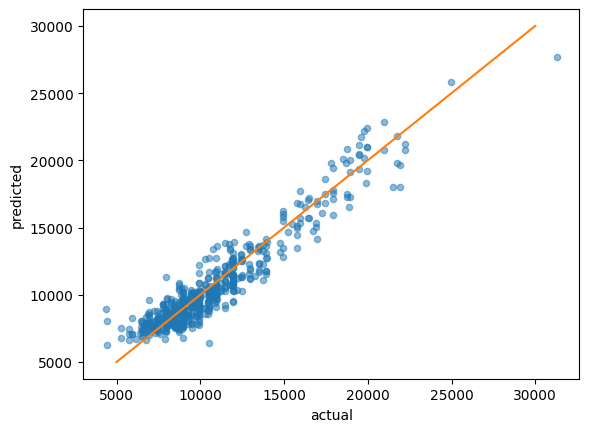

In [11]:
car_nnet = MLPRegressor(hidden_layer_sizes=(5, 5), activation='logistic', solver='lbfgs', random_state=1)
car_nnet.fit(X_train, y_train.ravel())

print('Training data (5, 5)')
y_actual = y_train * rangeY + minY
y_pred = car_nnet.predict(X_train) * rangeY + minY
regressionSummary(y_actual, y_pred)

print('\nValidation data (5, 5)')
y_actual = y_valid * rangeY + minY
y_pred = car_nnet.predict(X_valid) * rangeY + minY
regressionSummary(y_actual, y_pred)

ax = pd.DataFrame({'actual': y_actual, 'predicted': y_pred}).plot.scatter(x='actual', y='predicted', alpha=0.5)
plt.plot([5000, 30000], [5000, 30000], color='C1')
plt.show()